In [1]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


---

## ✅ Problem Statement:

**"Predict whether a person has diabetes based on health-related measurements using the KNN algorithm."**

We’ll use the popular **Pima Indians Diabetes Dataset**, which is perfect for classification tasks.

---

## 📦 Features in Dataset:

* Pregnancies
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI
* DiabetesPedigreeFunction
* Age
* Target: `0` (no diabetes) or `1` (has diabetes)





In [4]:
# Load from a CSV file
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None)

# Add column names
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
              'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
X= df.drop("Outcome",axis = 1)
y = df["Outcome"]

In [9]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [11]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

 ## Define Pipeline and Parameter Grid for GridSearchCV

In [16]:
pipeline = Pipeline([
    ('scalar',StandardScaler()),
    ("knn",KNeighborsClassifier())
])


In [20]:
param_grid = {
    "knn__n_neighbors": list(range(1,11)),
    'knn__weights' : ["uniform","distance"],
    "knn__metric" : ["euclidean","manhattan"] # distance metrics
}

In [21]:
grid = GridSearchCV(estimator=pipeline,param_grid=param_grid,cv = 5,n_jobs=1,verbose = 1,)

In [22]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'knn__weights': ['uniform', 'distance']},
             verbose=1)

In [24]:
print("best Paramters: - ",grid.best_params_)
print("best cross-validation_accuracy",grid.best_score_)

best Paramters: -  {'knn__metric': 'euclidean', 'knn__n_neighbors': 6, 'knn__weights': 'uniform'}
best cross-validation_accuracy 0.7606157536985206


In [26]:
# Using the best model
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

In [27]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [29]:
# Model evaluation

print("Accuracy\n :- ",accuracy_score(y_test,y_pred))
print("clasification report\n:- ",classification_report(y_test,y_pred))

Accuracy
 :-  0.7012987012987013
clasification report
:-                precision    recall  f1-score   support

           0       0.73      0.86      0.79        99
           1       0.62      0.42      0.50        55

    accuracy                           0.70       154
   macro avg       0.67      0.64      0.64       154
weighted avg       0.69      0.70      0.68       154



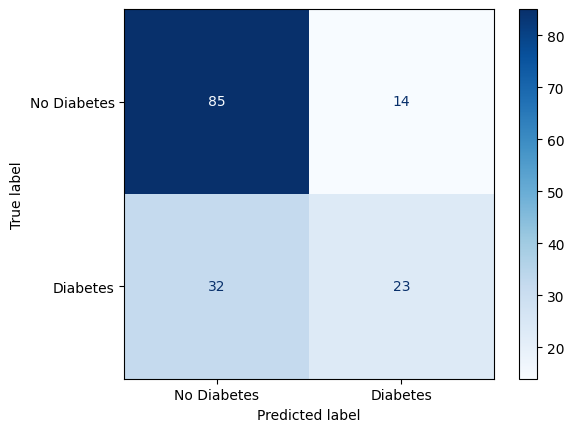

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = ["No Diabetes","Diabetes"])
disp.plot(cmap=plt.cm.Blues)

In [36]:
# roc curve